In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.odr import *
!git clone https://github.com/JCLMantilla/LabIntermedio

Cloning into 'LabIntermedio'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [3]:
data=pd.read_excel(io="/content/LabIntermedio/datos_intermedio_1.xlsx")
V=1000*data["U (kV)"]
D1=0.001*0.5*(data["Unnamed: 2"]+data["Diámetro 1 (mm)"])
S1=0.001*0.5*(data["Unnamed: 2"]-data["Diámetro 1 (mm)"])
D2=0.001*0.5*(data["Unnamed: 4"]+data["Diámetro 2 (mm)"])
S2=0.001*0.5*(data["Unnamed: 4"]-data["Diámetro 2 (mm)"])
datos=pd.DataFrame({"V":V,"D1":D1,"S1":S1,"D2":D2,"S2":S2})
datos

FileNotFoundError: ignored

In [ ]:
h=6.62e-34 #in international units
L=13.5/100 #in meters
e_mass=9.10e-31 #in Kg
e_charge=1.60*(10**-19) # in Coulombs
d_1=2.13e-10 #in meters
d_2=1.23e-10 #in meters

Lambda_broglie=h/np.sqrt(2*e_charge*e_mass*datos["V"]) #lambda de broglie
def Lambda_bragg(d,D):
  return 2*d*np.sin(0.5*np.arctan(datos[D]/(2*L)))
def DLambda_bragg(d,D):
  cosa=2*L*(1+((datos[D]**2)/(4*L*L)))
  return (d*np.cos(0.5*np.arctan(datos[D]/(2*L))))/cosa
#print(Lambda_broglie)

#plt.figure();plt.plot(datos["V"],Lambda_bragg(d_1,"D1"),color="blue");plt.show()
#plt.figure();plt.plot(datos["V"],Lambda_bragg(d_2,"D2"),color="red");plt.show()
#datos


In [ ]:
Lambda1=Lambda_bragg(d_1,"D1")
ErrorLambda1=np.abs(DLambda_bragg(d_1,"D1"))*datos["S1"]
Lambda2=Lambda_bragg(d_2,"D2")
ErrorLambda2=np.abs(DLambda_bragg(d_2,"D2"))*datos["S2"]
Lista_Bragg=pd.DataFrame({"V":(1e-9)*datos["V"],"Lambda1":Lambda1,"ErrorLambda1":ErrorLambda1,"Lambda2":Lambda2,"ErrorLambda2":ErrorLambda2})
error_total=100*np.abs(Lambda_broglie-(0.5*Lista_Bragg["Lambda1"]+0.5*Lista_Bragg["Lambda2"]))/Lambda_broglie
print(Lista_Bragg/1e-9)
print(pd.DataFrame({"V":(1e-9)*datos["V"],"Lambda_Mean":0.5*Lista_Bragg["Lambda1"]+0.5*Lista_Bragg["Lambda2"],"Lambda_Mean_Error":0.5*Lista_Bragg["ErrorLambda1"]+0.5*Lista_Bragg["ErrorLambda2"],"Lambda_broglie":Lambda_broglie,"error_total":(1e-9)*error_total})/1e-9)

        V   Lambda1  ErrorLambda1   Lambda2  ErrorLambda2
0  3200.0  0.023616      0.001965  0.022973      0.000898
1  3400.0  0.022799      0.001343  0.022392      0.001481
2  3600.0  0.021747      0.000994  0.021701      0.001055
3  3800.0  0.021416      0.001053  0.020908      0.000705
4  4000.0  0.020713      0.000741  0.020158      0.000619
5  4200.0  0.020831      0.000937  0.019727      0.000785
6  4400.0  0.019718      0.001543  0.019350      0.000388
        V  Lambda_Mean  Lambda_Mean_Error  Lambda_broglie  error_total
0  3200.0     0.023295           0.001431        0.021686     7.416586
1  3400.0     0.022596           0.001412        0.021039     7.399864
2  3600.0     0.021724           0.001025        0.020446     6.249221
3  3800.0     0.021162           0.000879        0.019901     6.336664
4  4000.0     0.020436           0.000680        0.019397     5.354715
5  4200.0     0.020279           0.000861        0.018929     7.126870
6  4400.0     0.019534           0.0009

In [ ]:
datos

,V,D1,S1,D2,S2
0,3200.0,0.030075,0.002525,0.051100,0.002050
1,3400.0,0.029025,0.001725,0.049775,0.003375
2,3600.0,0.027675,0.001275,0.048200,0.002400
3,3800.0,0.027250,0.001350,0.046400,0.001600
4,4000.0,0.026350,0.000950,0.044700,0.001400
5,4200.0,0.026500,0.001200,0.043725,0.001775
6,4400.0,0.025075,0.001975,0.042875,0.000875


Beta: [ 1.68354431e+00 -4.70590182e-07]
Beta Std Error: [0.02236224 0.00034048]
Beta Covariance: [[ 1.19527848e+04 -1.70013429e+02]
 [-1.70013429e+02  2.77087160e+00]]
Residual Variance: 4.183709493662889e-08
Inverse Condition #: 0.0005426891828804266
Reason(s) for Halting:
  Iteration limit reached
Beta: [ 2.8669198e+00 -2.6725150e-06]
Beta Std Error: [0.03242838 0.00049507]
Beta Covariance: [[ 3.43488394e+04 -4.89565288e+02]
 [-4.89565288e+02  8.00575451e+00]]
Residual Variance: 3.0615300131055396e-08
Inverse Condition #: 0.0005466145264796024
Reason(s) for Halting:
  Iteration limit reached


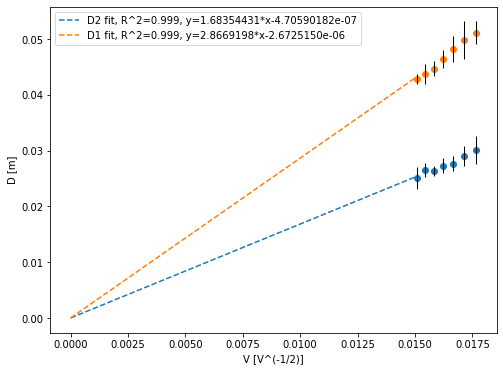

In [ ]:

#plt.plot(1/np.sqrt(datos["V"]),2*np.sqrt(2*e_charge*e_mass)*np.sin(0.5*np.arctan(datos["D1"]/(2*L))))

pre_x=1/np.sqrt(datos["V"])
x=np.concatenate(([0],[item for item in pre_x]));x=pd.DataFrame({"V":x})
##
x_error=np.zeros(len(x))
##
y_1=np.concatenate(([0],[item for item in datos["D1"]]));y_1=pd.DataFrame({"D1":y_1})
y_2=np.concatenate(([0],[item for item in datos["D2"]]));y_2=pd.DataFrame({"D2":y_2})
y_1_error=np.concatenate(([0],[item for item in datos["S1"]]));y_1_error=pd.DataFrame({"S1":y_1_error})
y_2_error=np.concatenate(([0],[item for item in datos["S2"]]));y_2_error=pd.DataFrame({"S2":y_2_error})

#plt.figure(figsize=(8,6));
#plt.errorbar(x["V"],y_1["D1"],y_1_error["S1"], x_error["error"], ecolor="black",elinewidth=1,linestyle='--',fmt="none")
#plt.plot(x["V"],y_1["D1"],"--o",linewidth=0.8)
#plt.errorbar(x["V"],y_2["D2"],y_2_error["S2"], x_error["error"], ecolor="black",elinewidth=1,linestyle='--',fmt="none")
#plt.plot(x["V"],y_2["D2"],"--o",linewidth=0.8)
#plt.xlabel("U [V^(-1/2)]")
#plt.ylabel("D [m]")
#plt.show()

x=np.array(x["V"])

y_1=np.array(y_1["D1"])
y1_err = np.array(y_1_error["S1"])
y1_err[0]=0.000000001


y_2=np.array(y_2["D2"])
y2_err = np.array(y_2_error["S2"])
y2_err[0]=0.000000001

def f(B, x):
    return B[0]*x + B[1]
linear = Model(f)
mydata = RealData(x, y_1, sy=y1_err)
myodr = ODR(mydata, linear, beta0=[0,1])
myoutput = myodr.run()
myoutput.pprint()


def f(B, x):
    return B[0]*x + B[1]
linear = Model(f)
mydata = RealData(x, y_2, sy=y2_err)
myodr = ODR(mydata, linear, beta0=[0,1])
myoutput = myodr.run()
myoutput.pprint()


x_fit=np.linspace(x[0],x[7],100)
y1_fit=1.68354431*x_fit-4.70590182e-07
y2_fit=2.8669198*x_fit-2.6725150e-06


plt.figure(figsize=(8,6))
plt.plot(x_fit,y1_fit,linestyle='--',label="D2 fit, R^2=0.999, y=1.68354431*x-4.70590182e-07")
plt.plot(x_fit,y2_fit,linestyle='--',label="D1 fit, R^2=0.999, y=2.8669198*x-2.6725150e-06",)

plt.errorbar(x,y_1,y1_err, x_error, ecolor="black",elinewidth=1,linestyle='--',fmt="none")
plt.errorbar(x,y_2,y2_err, x_error, ecolor="black",elinewidth=1,linestyle='--',fmt="none")
plt.scatter(x[1:],y_1[1:])
plt.scatter(x[1:],y_2[1:])
plt.xlabel("V [V^(-1/2)]")
plt.ylabel("D [m]")
plt.legend()
plt.show()

res_var1=4.183709493662889e-08
res_var2=3.0615300131055396e-08
r1=1-res_var1
r2=1-res_var2


In [ ]:
m1=1.68354431
m1_err=0.02236224

m2=2.8669198
m2_err=0.03242838

h=6.62e-34 #in international units
L=13.5/100 #in meters
e_mass=9.10e-31 #in Kg
e_charge=1.60*(10**-19) # in Coulombs
d_1=2.13e-10 #in meters
d_2=1.23e-10 #in meters

d1exp=m1*4*(h*L)/(2*np.sqrt(2*e_charge*e_mass))
d1expr=m1_err*4*(h*L)/(2*np.sqrt(2*e_charge*e_mass))


d2exp=m2*4*(h*L)/(2*np.sqrt(2*e_charge*e_mass))
d2expr=m2_err*4*(h*L)/(2*np.sqrt(2*e_charge*e_mass))



print(d1exp)
print(d1expr)
print("//////////////////////////////////")
print(d2exp)
print(d2expr)
print("//////////////////////////////////")
print(100*np.abs(d1exp-d_1)/d_1)
print(100*np.abs(d2exp-d_2)/d_1)

5.576357640918113e-10
7.406983418930308e-12
//////////////////////////////////
9.49601981823064e-10
1.074116336121834e-11
//////////////////////////////////
161.80082821211803
388.0760478042554
